In [2]:
from __future__ import division 
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import colors
import numpy as np
import colorsys


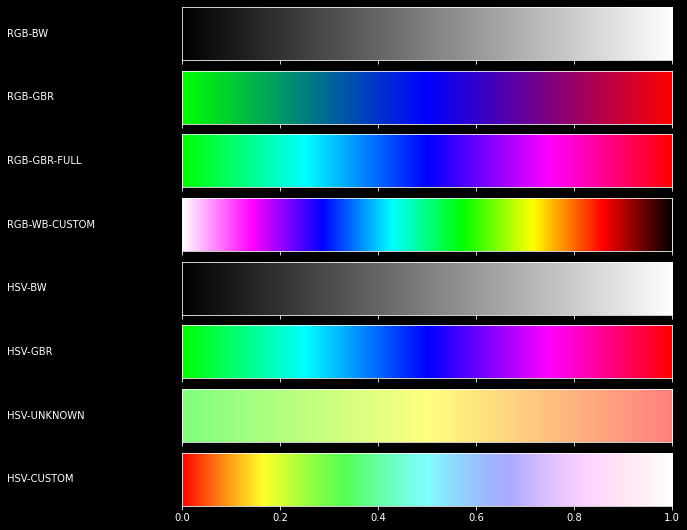

In [7]:
def plot_color_gradients(gradients, names):
    rc('legend', fontsize=10)

    column_width_pt = 700         
    pt_per_inch = 72
    size = column_width_pt / pt_per_inch

    fig, axes = plt.subplots(nrows=len(gradients), sharex=True, figsize=(size, 0.75 * size))
    fig.subplots_adjust(top=1.00, bottom=0.05, left=0.25, right=0.95)
    

    for ax, gradient, name in zip(axes, gradients, names):
        # Create image with two lines and draw gradient on it
        img = np.zeros((2, 1024, 3))
        for i, v in enumerate(np.linspace(0, 1, 1024)):
            img[:, i] = gradient(v)

        im = ax.imshow(img, aspect='auto')
        im.set_extent([0, 1, 0, 1])
        ax.yaxis.set_visible(False)

        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.25
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='left', fontsize=10)

    fig.savefig('my-gradients.pdf')
    
    plt.style.use(['dark_background'])
    plt.show()
    
    
def hsv2rgb(h, s, v):
    if s == 0.0: 
        return (v, v, v)
    
    H_i = int(h / 60)
    f = (h / 60) - H_i
    p = v * (1 - s) 
    q = v * (1 - s * f)
    t = v * (1 - s * (1 - f))
    
    if H_i == 0: return (v, t, p)
    if H_i == 1: return (q, v, p)
    if H_i == 2: return (p, v, t)
    if H_i == 3: return (p, q, v)
    if H_i == 4: return (t, p, v)
    if H_i == 5: return (v, p, q)
    

def gradient_rgb_bw(v):           
    return (v, v, v)


def gradient_rgb_gbr(v):
    if (v < 0.5):
        return (0, 1-2*v, 2*v)
    else:
        return(2*(v-0.5), 0, 1-2*(v-0.5))



def gradient_rgb_gbr_full(v):
    if (v < 0.25):
        return (0, 1, v*4)
    elif (v < 0.5):
        return(0, 1 - (v-0.25)*4 ,1)
    elif (v < 0.75):
        return((v-0.5)*4, 0, 1)        
    else:
        return(1, 0, 1-(v-0.75)*4)


def gradient_rgb_wb_custom(v):
    if (v < 1 / 7):
        return (1, 1-v*7, 1)
    elif(v < 2 / 7):
        return(1 - (v-1/7)*7, 0, 1)
    elif (v < 3 / 7):
        return(0, (v-2/7)*7, 1)
    elif (v < 4 / 7):
        return(0, 1, 1-(v-3/7)*7)
    elif (v < 5 / 7):
        return((v-4/7)*7, 1, 0)
    elif ( v < 6 / 7):
        return(1, 1 - (v-5/7)*7, 0)
    elif(v < 7 / 7):
        return(1 - (v - 6/7)*7, 0, 0)
    else:
        return(1, 1, 1)

    
def gradient_hsv_bw(v):  
    return hsv2rgb(v, 0, v)


def gradient_hsv_gbr(v):
    return hsv2rgb(120 + 240 * v, 1, 1)


def gradient_hsv_unknown(v):
    return hsv2rgb(120 - 120 * v, 0.5, 1)


def gradient_hsv_custom(v):
    return hsv2rgb(v * 360, 1-v, 1)


def toname(g):
    return g.__name__.replace('gradient_', '').replace('_', '-').upper()

gradients = (gradient_rgb_bw, gradient_rgb_gbr, gradient_rgb_gbr_full, gradient_rgb_wb_custom,
             gradient_hsv_bw, gradient_hsv_gbr, gradient_hsv_unknown, gradient_hsv_custom)
 
plot_color_gradients(gradients, [toname(g) for g in gradients])
